In [38]:
#Various imports. Some might not be needed.
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as panda
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import math
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Embedding, Dense, Input, Dropout, LSTM, Activation, Conv2D, Reshape, Average, Bidirectional
import matplotlib.pyplot as plt

In [48]:
#reading our dataframe, and printing out to inspect
df = panda.read_csv("NAS.csv")
df = df.dropna()
df.head()

In [51]:
#Saving the close price
data = df.filter(['Close'])

In [52]:
#copying the values
dataset = data.values

In [53]:
#seting the training data lenght to 80%
training_data_lenght = math.ceil(len(dataset) * .8)

In [54]:
#scaling the data to range (0,1)
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

In [55]:
#making the train arrays x and y.
train_data = scaled_data[0:training_data_lenght , :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [56]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [57]:
#implementing the lsmt algorithm.
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [58]:
#reshaping trains to be 3d
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(3315, 60, 1)

In [59]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [60]:
#training the data
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

3315/3315 [==============================] - 61s 18ms/step - loss: 0.0014


In [61]:
#creating test arrays. 
test_data = scaled_data[training_data_lenght - 60: , :]
x_test = []
y_test = dataset[training_data_lenght: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [62]:
len(x_test)

843

In [63]:
x_test = np.array(x_test)

In [64]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [65]:
#Get the predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [66]:
#get the RMSE (margin of error)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.7963673289956192

In [67]:
#Creating a dataset with close price and prediction
train = data[:training_data_lenght]
valid = data[training_data_lenght:]
valid['Predictions'] = predictions
valid

<ipython-input-67-01ddf31d69a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,Close,Predictions
3408,128.722000,134.094498
3409,125.922997,133.820679
3410,126.723000,132.547668
3411,125.009003,131.362335
3412,130.550995,130.060181
...,...,...
4248,0.676800,-1.598330
4249,0.600600,-1.656354
4250,0.626000,-1.722118
4251,0.605000,-1.776917


In [68]:
df['prediction'] = valid.Predictions    

In [69]:
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,prediction
3408,2017-06-07,133.979004,134.093002,127.580002,128.722000,128.722000,814778.0,134.094498
3409,2017-06-08,129.694000,129.865005,125.694000,125.922997,125.922997,472537.0,133.820679
3410,2017-06-09,127.694000,127.694000,125.408997,126.723000,126.723000,249201.0,132.547668
3411,2017-06-12,126.836998,127.750999,124.723000,125.009003,125.009003,444550.0,131.362335
3412,2017-06-13,125.694000,130.722000,125.694000,130.550995,130.550995,636722.0,130.060181
...,...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0,-1.598330
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0,-1.656354
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0,-1.722118
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0,-1.776917


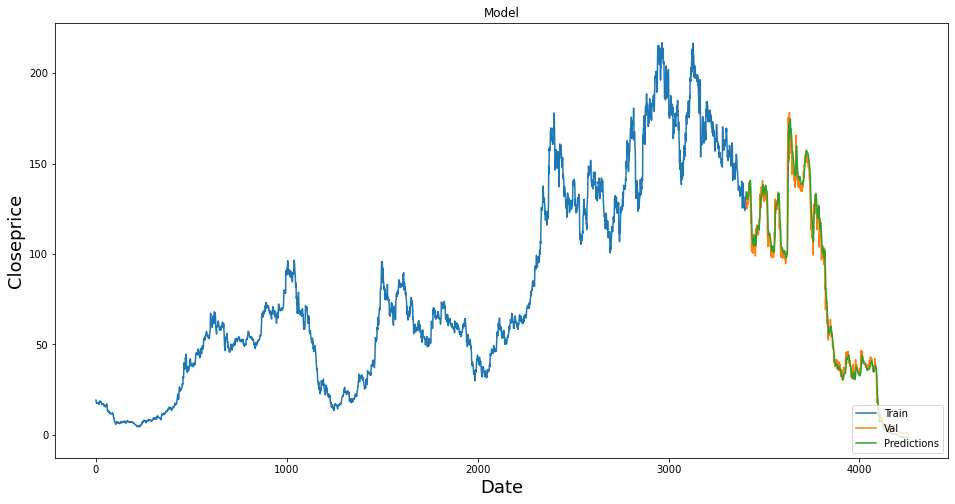

In [70]:
#Visualizing our train, values, and predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closeprice', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [71]:
#User input to check a spesific date. We were not able to get the algorithm to foresee the future...
user_input = input("pick a date")
df.loc[df['Date'] == user_input]

pick a date2020-05-05


,Date,Open,High,Low,Close,Adj Close,Volume,prediction
4136,2020-05-05,5.42,5.728,4.8,4.8,4.8,15897592.0,2.922835
